In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
df = pd.read_csv("Student Mental health.csv", sep=",")
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
df.shape

(101, 11)

In [5]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [6]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [7]:
df = df.drop(columns=['Timestamp', 'Choose your gender', 'Age'])

In [8]:
df.columns

Index(['What is your course?', 'Your current year of Study',
       'What is your CGPA?', 'Marital status', 'Do you have Depression?',
       'Do you have Anxiety?', 'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [9]:
rename_columns = {
    'What is your course?': 'Course',
    'Your current year of Study': 'Current_year',
    'What is your CGPA?': 'CGPA',
    'Marital status': 'Marital_status',
    'Do you have Depression?': 'Depression',
    'Do you have Anxiety?': 'Anxiety',
    'Do you have Panic attack?': 'Panick_attack',
    'Did you seek any specialist for a treatment?': 'Sought_specialist_treatment',
}

df = df.rename(columns=rename_columns)
df.columns

Index(['Course', 'Current_year', 'CGPA', 'Marital_status', 'Depression',
       'Anxiety', 'Panick_attack', 'Sought_specialist_treatment'],
      dtype='object')

In [10]:
df['CGPA'].value_counts()

CGPA
3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: count, dtype: int64

In [11]:
indice = df.index[df['CGPA'] == '3.50 - 4.00 '].tolist()
indice

[6]

In [12]:
df.loc[df['CGPA'] == '3.50 - 4.00 ', 'CGPA'] = '3.50 - 4.00'
df['CGPA'].value_counts()

CGPA
3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        4
2.00 - 2.49     2
Name: count, dtype: int64

In [13]:
df.loc[df['CGPA'] == '3.50 - 4.00', 'CGPA'] = 5.0
df.loc[df['CGPA'] == '3.00 - 3.49', 'CGPA'] = 4.0
df.loc[df['CGPA'] == '2.50 - 2.99', 'CGPA'] = 3.0
df.loc[df['CGPA'] == '2.00 - 2.49', 'CGPA'] = 2.0
df.loc[df['CGPA'] == '0 - 1.99', 'CGPA'] = 1.0
df['CGPA'].value_counts()

CGPA
5.0    48
4.0    43
3.0     4
1.0     4
2.0     2
Name: count, dtype: int64

In [14]:
df.head()

,Course,Current_year,CGPA,Marital_status,Depression,Anxiety,Panick_attack,Sought_specialist_treatment
0,Engineering,year 1,4.0,No,Yes,No,Yes,No
1,Islamic education,year 2,4.0,No,No,Yes,No,No
2,BIT,Year 1,4.0,No,Yes,Yes,Yes,No
3,Laws,year 3,4.0,Yes,Yes,No,No,No
4,Mathemathics,year 4,4.0,No,No,No,No,No


In [15]:
df['Current_year'].value_counts()

Current_year
year 1    41
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Year 1     2
Name: count, dtype: int64

In [16]:
df.loc[df['Current_year'] == 'Year 2', 'Current_year'] = 'year 2'
df.loc[df['Current_year'] == 'Year 3', 'Current_year'] = 'year 3'
df.loc[df['Current_year'] == 'Year 1', 'Current_year'] = 'year 1'
df['Current_year'].value_counts()

Current_year
year 1    43
year 2    26
year 3    24
year 4     8
Name: count, dtype: int64

In [17]:
df.loc[df['Current_year'] == 'year 1', 'Current_year'] = 1.0
df.loc[df['Current_year'] == 'year 2', 'Current_year'] = 2.0
df.loc[df['Current_year'] == 'year 3', 'Current_year'] = 3.0
df.loc[df['Current_year'] == 'year 4', 'Current_year'] = 4.0
df['Current_year'].value_counts()

Current_year
1.0    43
2.0    26
3.0    24
4.0     8
Name: count, dtype: int64

In [18]:
df.head()

,Course,Current_year,CGPA,Marital_status,Depression,Anxiety,Panick_attack,Sought_specialist_treatment
0,Engineering,1.0,4.0,No,Yes,No,Yes,No
1,Islamic education,2.0,4.0,No,No,Yes,No,No
2,BIT,1.0,4.0,No,Yes,Yes,Yes,No
3,Laws,3.0,4.0,Yes,Yes,No,No,No
4,Mathemathics,4.0,4.0,No,No,No,No,No


In [19]:
df['Course'].value_counts()

Course
BCS                        18
Engineering                17
BIT                        10
KOE                         4
Biomedical science          4
psychology                  2
BENL                        2
Engine                      2
Laws                        2
Irkhs                       1
Psychology                  1
Accounting                  1
KENMS                       1
Mathemathics                1
Pendidikan islam            1
Human Resources             1
Islamic education           1
Business Administration     1
Banking Studies             1
Marine science              1
ENM                         1
TAASL                       1
Usuluddin                   1
ALA                         1
Law                         1
koe                         1
Kirkhs                      1
Benl                        1
IT                          1
CTS                         1
engin                       1
Econs                       1
KIRKHS                      1
MHS

In [20]:
course_others = {
    'BCS': ['BCS'],
    'Engineering': ['Engineering'],
    'BIT': ['BIT'],
    'KOE': ['KOE'],
    'Biomedical science': ['Biomedical science'],
    'psychology': ['psychology'],
    'BENL': ['BENL'],
    'Engine': ['Engine'],
    'Laws': ['Laws'],
    'Outros': ['Irkhs', 'Psychology', 'Accounting', 'KENMS',
               'Mathemathics', 'Pendidikan islam', 'Human Resources',
               'Islamic education', 'Business Administration',
               'Banking Studies', 'Marine science', 'ENM', 'TAASL',
               'Usuluddin', 'ALA', 'Law', 'koe', 'Kirkhs', 'Benl',
               'IT', 'CTS', 'engin', 'Econs', 'KIRKHS', 'MHSC',
               'Malcom', 'Human Sciences', 'Kop', 'Communication',
               'Diploma Nursing', 'Pendidikan Islam', 'Biotechnology',
               'Radiography', 'Fiqh fatwa', 'DIPLOMA TESL', 'Koe',
               'Figh', 'Islamic Education', 'Nursing', 'Pendidikan Islam ']
}

map_course = {
    curso: outro
    for outro, cursos in course_others.items()
    for curso in cursos
}

df["Course"] = df["Course"].map(map_course).fillna("Outros")
df['Course'].value_counts()

Course
Outros                40
BCS                   18
Engineering           17
BIT                   10
KOE                    4
Biomedical science     4
Laws                   2
Engine                 2
BENL                   2
psychology             2
Name: count, dtype: int64

In [21]:
df.head()

,Course,Current_year,CGPA,Marital_status,Depression,Anxiety,Panick_attack,Sought_specialist_treatment
0,Engineering,1.0,4.0,No,Yes,No,Yes,No
1,Outros,2.0,4.0,No,No,Yes,No,No
2,BIT,1.0,4.0,No,Yes,Yes,Yes,No
3,Laws,3.0,4.0,Yes,Yes,No,No,No
4,Outros,4.0,4.0,No,No,No,No,No


In [30]:
df.loc[df['Anxiety'] == 'No', 'Anxiety'] = 0.0
df.loc[df['Anxiety'] == 'Yes', 'Anxiety'] = 1.0

In [31]:
df.loc[df['Panick_attack'] == 'No', 'Panick_attack'] = 0.0
df.loc[df['Panick_attack'] == 'Yes', 'Panick_attack'] = 1.0

In [32]:
df.loc[df['Marital_status'] == 'No', 'Marital_status'] = 0.0
df.loc[df['Marital_status'] == 'Yes', 'Marital_status'] = 1.0

In [34]:
df.loc[df['Sought_specialist_treatment'] == 'No', 'Sought_specialist_treatment'] = 0.0
df.loc[df['Sought_specialist_treatment'] == 'Yes', 'Sought_specialist_treatment'] = 1.0
df.head()

,Course,Current_year,CGPA,Marital_status,Depression,Anxiety,Panick_attack,Sought_specialist_treatment
0,Engineering,1.0,4.0,0.0,Yes,0.0,1.0,0.0
1,Outros,2.0,4.0,0.0,No,1.0,0.0,0.0
2,BIT,1.0,4.0,0.0,Yes,1.0,1.0,0.0
3,Laws,3.0,4.0,1.0,Yes,0.0,0.0,0.0
4,Outros,4.0,4.0,0.0,No,0.0,0.0,0.0


Vetorização de categorias

In [35]:
# Inicializa o codificador OneHotEncoder para transformar variáveis categóricas em numéricas
ohe_encoder = OneHotEncoder(sparse_output=False)

# Define a lista de colunas categóricas a serem codificadas
categorical_columns = [
    'Course'
]

# Remove a coluna alvo antes de trabalhar nos atributos
df_features = df.drop(columns=['Depression'])

# Aplica a codificação One-Hot nas colunas categóricas do conjunto de treinamento
encoded_data = ohe_encoder.fit_transform(df_features[categorical_columns])

# Obtém os nomes das novas colunas geradas pela codificação
new_columns = ohe_encoder.get_feature_names_out(categorical_columns)

# Cria um DataFrame com os dados codificados e os novos nomes de colunas
df_ohe = pd.DataFrame(encoded_data, columns=new_columns)

# Remove as colunas categóricas originais do conjunto de treinamento
df_not_phe = df_features.drop(columns=categorical_columns).reset_index(drop=True)

# Concatena o DataFrame com as colunas codificadas ao DataFrame original
X = pd.concat([df_not_phe, df_ohe], axis=1)

In [36]:
X.head()

,Current_year,CGPA,Marital_status,Anxiety,Panick_attack,Sought_specialist_treatment,Course_BCS,Course_BENL,Course_BIT,Course_Biomedical science,Course_Engine,Course_Engineering,Course_KOE,Course_Laws,Course_Outros,Course_psychology
0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Vetorização de classes

In [37]:
y = df['Depression']
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(y)
y = encoded_label
y[:100]

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0])

In [41]:
len(df.columns)

8

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
modelo = RandomForestClassifier(max_depth=14, max_leaf_nodes=10)
modelo.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,14
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,10
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
y_pred = modelo.predict(X_test)

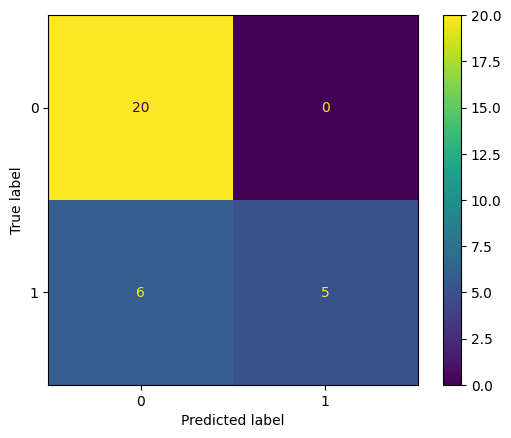

In [48]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [ ]:
print('Acurácia:', accuracy_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Acurácia: 0.8064516129032258
F1: 0.625
